### Задание

Самостоятельно напишите нейронную сеть, которая может стать составной частью системы бота для игры в "Крестики-нолики". Используя подготовленную базу изображений, создайте и обучите нейронную сеть, распознающую две категории изображений: крестики и нолики. Добейтесь точности распознавания более 95% (accuracy)


In [ ]:
from tensorflow import keras
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense, Dropout
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam
# Подключение утилит для to_categorical
from tensorflow.keras import utils
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split

# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение модуля для работы с файлами
import os
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt
from PIL import Image
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

In [ ]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_pro.zip', None, quiet=True)

'hw_pro.zip'

In [ ]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_pro.zip

In [ ]:
# Путь к директории с базой
base_dir = '/content/hw_pro'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                         target_size=(img_height, img_width),
                                                         color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        else:
            y_train.append(1)
# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train_org.shape)
print('Размер массива y_train', y_train_org.shape)

Размер массива x_train (102, 20, 20, 1)
Размер массива y_train (102,)


In [ ]:
x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(x_train_org, y_train_org, test_size=0.2, random_state=42)

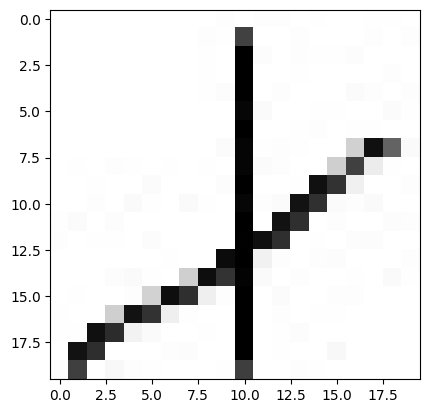

In [ ]:
# Отрисовка картинки
plt.imshow(x_train_org[12], cmap='gray')

# Вывод n-й картинки
plt.show()

In [ ]:
# Вывод метки класса для n-го изображения
print(y_train_org[12])

1


In [ ]:
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (81, 20, 20, 1) -> (81, 400)
Форма  тестовых данных: (21, 20, 20, 1) -> (21, 400)


In [ ]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [ ]:
CLASS_COUNT = 2

# Преобразование ответов в формат one_hot_encoding
y_train = keras.utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = keras.utils.to_categorical(y_test_org, CLASS_COUNT)

print(y_train.shape)

# Вывод примера одного выходного вектора
print(y_train[0])

(81, 2)
[0. 1.]


In [ ]:
model = keras.Sequential([
    Dense(512, activation="relu", input_shape=(img_height * img_width,)),  # Входной слой
    Dropout(0.3),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dense(2, activation="softmax")  # Выходной слой (2 класса)
])

# Компиляция модели
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Обучение модели
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Оценка точности
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

# Вывод точности
print(f"\nТочность модели на тестовых данных: {test_acc:.4f}")

# Сохранение модели
model.save("tic_tac_toe_dense.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4807 - loss: 1.0084 - val_accuracy: 0.3810 - val_loss: 0.8350
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5574 - loss: 0.7815 - val_accuracy: 0.4286 - val_loss: 0.6685
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6654 - loss: 0.6589 - val_accuracy: 0.8095 - val_loss: 0.5520
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6995 - loss: 0.6065 - val_accuracy: 0.4762 - val_loss: 0.6156
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6686 - loss: 0.5577 - val_accuracy: 0.6190 - val_loss: 0.5042
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6608 - loss: 0.6165 - val_accuracy: 0.9524 - val_loss: 0.4560
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7812 - loss: 0.4750 - val_accuracy: 1.0000 - val_loss: 0.3856
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7958 - loss: 0.4581 - val_accuracy: 0.9048 - val_loss: 0.3464
Ep


Точность модели на тестовых данных: 0.9524
